In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
os.chdir('E:\Practical Time Series')
data = pd.read_excel('datasets/Monthly_CO2_Concentrations.xlsx',
converters={'Year': np.int32, 'Month': np.int32})
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


In [6]:
data = data.loc[(~pd.isnull(data['CO2']))&\
                (~pd.isnull(data['Year']))&\
                (~pd.isnull(data['Month']))]
data.sort_values(['Year', 'Month'], inplace=True)

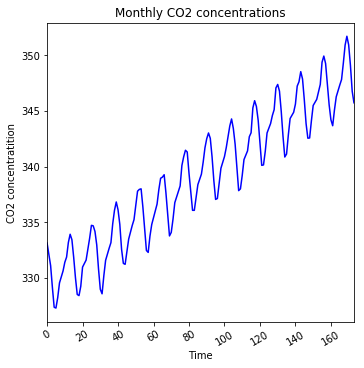

In [7]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/Section 1/_01_05.png', format='png', dpi=300)

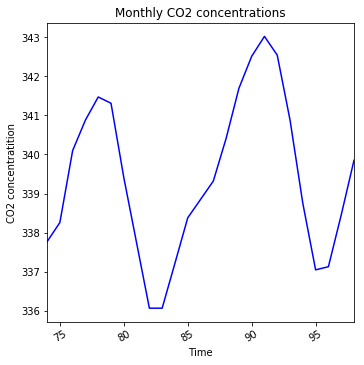

In [8]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/Section 1/_01_06.png', format='png', dpi=300)

In [12]:
from sklearn.linear_model import LinearRegression
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.array(data.index).reshape((-1,1)), data['CO2'])
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_) 
)

Trend model coefficient=0.1118220785454603 and intercept=329.4554222337025


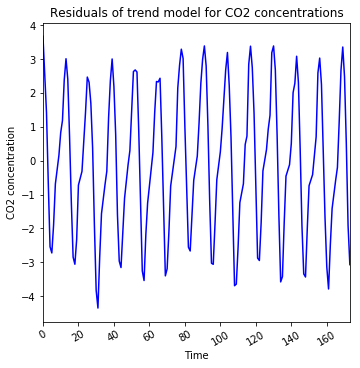

In [15]:
residuals = np.array(data['CO2']) - trend_model.predict(np.array(data.index).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentration')
plt.xticks(rotation=30)
plt.savefig('plots/Section 1/_01_07.png', format='png', dpi=300)

In [16]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
4: 'Q2', 5: 'Q2', 6: 'Q2',
7: 'Q3', 8: 'Q3', 9: 'Q3',
10: 'Q4', 11: 'Q4', 12: 'Q4'
}
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

In [17]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std]) 

In [18]:
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

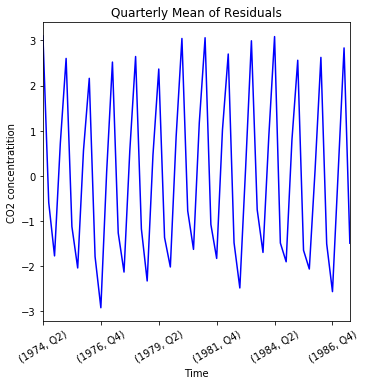

In [19]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/Section 1/_01_08.png', format='png', dpi=300)

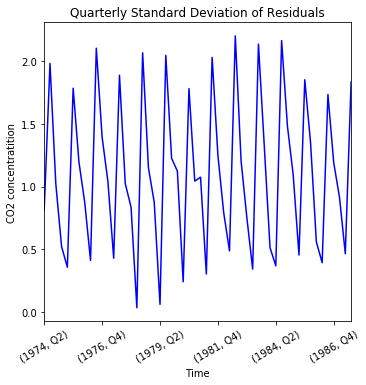

In [21]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)
plt.savefig('plots/Section 1/_01_09.png', format='png', dpi=300)

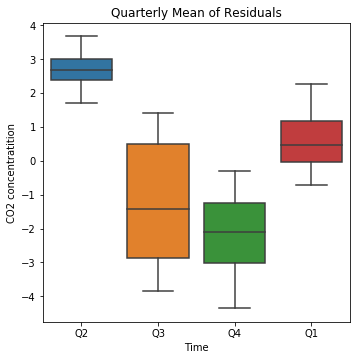

In [22]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Mean of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition')
plt.savefig('plots/Section 1/_01_10.png', format='png', dpi=300)

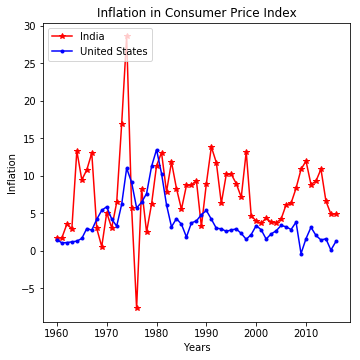

In [23]:
inflation = pd.read_excel('datasets/inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*',
color='r')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-',
marker='.', color='b')
plt.legend(['India','United States'], loc=2)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years')
plt.savefig('plots/Section 1/_01_11.png', format='png', dpi=300)